In [85]:
# project name: flexpart_management
# created by diego aliaga daliaga_at_chacaltaya.edu.bo

from useful_scit.imps import *
import matplotlib.colors
import wrf
import flexpart_management.modules.FlexLogPol as FlexLogPol
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

plt.rcParams['figure.facecolor'] = 'white'

# constants

In [86]:
V_MAX_MIN_DIC = dict(vmin=1e-8 , vmax=1e-4)

In [87]:
path = \
    '/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/' + \
    'run_2019-10-02_13-42-52_/log_pol/run_2019-10-02_13-42-52_'
# flp = FLP.FlexLogPol(path,concat=True)
# selfFLP = FLP.FlexLogPol(path,concat=False)
selfFLP = FlexLogPol.FlexLogPol(
    path ,
    # concat=True,
    concat=False ,
    get_clusters=False ,
    #     open_merged=False,
    open_merged=True ,
    # merge_ds=False ,
    merge_ds=True ,
    clusters_avail=False ,
    postprocess=True ,
    use_new_merge_fun=True
    )

'using vol for conc'
starting


In [88]:
ds = selfFLP.merged_ds

In [89]:
hasl = 'hasl'

In [90]:

ds[ hasl ] = (ds[ co.TOPO ] / 250).round()*250 + ds[ co.ZM ]

In [91]:
ds_c = ds.reset_coords()[ co.CC ][ { co.RL : slice(None,None) } ]
ds_h = ds.reset_coords()[ hasl ]

In [92]:
ds_c_s:xr.DataArray = ds_c.sum([co.RL,co.TH_CENTER])
ds_c_s

<xarray.DataArray 'CONC_conc' (R_CENTER: 43, ZMID: 60)>
array([[1.013057e-01, 1.658168e-03, 2.121568e-04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.171940e-02, 9.417744e-04, 1.093185e-04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.108684e-02, 8.641117e-04, 1.038403e-04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [2.987414e-10, 9.140609e-11, 5.285975e-11, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.910549e-12, 1.471795e-12, 1.827895e-12, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.734110e-18, 1.187269e-15, 9.981896e-16, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])
Coordinates:
  * R_CENTER  (R_CENTER) float64 0.01592 0.01906 0.02282 ... 21.33 25.53 30.57
  * ZMID      (ZMID) float64 250.0 750.0 1.25e+03 ... 2.925e+04 2.975e+04

In [93]:

coords_ = [ co.ZM , co.R_CENTER , co.TH_CENTER ]
ds_c1 = ds_c.transpose( co.RL,*coords_ , transpose_coords=True )
ds_h = ds_h.transpose( *coords_, transpose_coords=True )

In [94]:
zets = np.arange(250,15000,500)
res = wrf.interplevel(ds_c1,ds_h,zets)

# res.plot()
# plt.show()

In [95]:
res
res1:xr.DataArray = res.sum([co.TH_CENTER,co.RL])

Text(0.5, 0, 'radial distance from chc [100 km]')

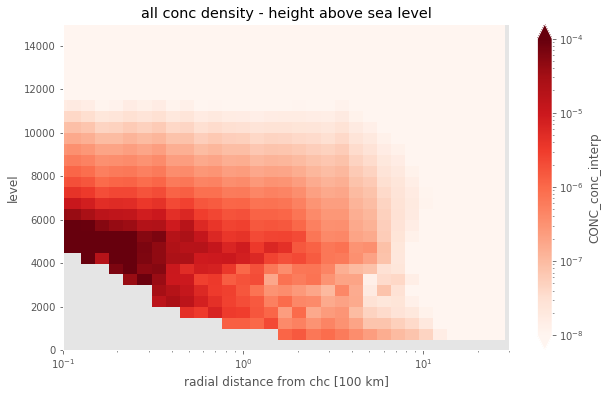

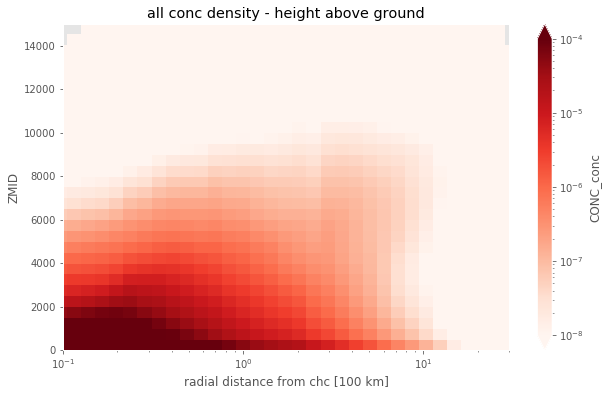

In [96]:
# noinspection PyUnresolvedReferences
plt.rcParams['figure.facecolor'] = 'white'
ops = dict(
    norm=mpl.colors.LogNorm(**V_MAX_MIN_DIC),
    cmap=plt.get_cmap('Reds') ,
    xscale='log',
    xlim=(.1,30) ,
    ylim=(0,15000) ,
)
f,ax = plt.subplots( figsize=(10,6) )
res1.plot.pcolormesh(ax =ax , **ops)
ax.set_title('all conc density - height above sea level')
ax.set_xlabel('radial distance from chc [100 km]')
f,ax = plt.subplots( figsize=(10,6) )
ds_c_s.plot(y=co.ZM , x=co.R_CENTER,ax =ax , **ops)
ax.set_title('all conc density - height above ground');
ax.set_xlabel('radial distance from chc [100 km]')